<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-In-MachineLearning/blob/main/ChurnLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression 

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir()

['.config', 'sample_data']

In [3]:
os.chdir('sample_data')

In [4]:
df = pd.read_csv('churnRate.csv')
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# EDA

In [13]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [36]:
#convert "total charges" type to float
df['TotalCharges'].astype('float')

ValueError: ignored

In [5]:
#convert Total Charges to numeric instead to correct the above error
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [6]:
#create a numeric target feature from Churn
df['isChurn']= pd.get_dummies(df['Churn'], drop_first=True).rename(columns={'Yes':'Churn'})

In [7]:
# [i for i in df.isna().sum().values if i>0]
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
isChurn              0
dtype: int64

In [8]:
# those customers with Nan under total charges
df.loc[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,isChurn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0


In [9]:
# the nan values can be converted to 0 using np.nan_to_num.
# But since it is a total charge I will populate Nan with median charge
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
isChurn             0
dtype: int64

In [ ]:
df[['tenure', 'MonthlyCharges']].agg(['min', 'max', 'mean', 'median'])

,tenure,MonthlyCharges
min,0.000000,18.250000
max,72.000000,118.750000
mean,32.371149,64.761692
median,29.000000,70.350000


In [ ]:
print(f"The minimum number of months a customer stays with a provider is: {df['tenure'].min()} months")
print(f"The maximum number of months a customer stays with a provider is: {df['tenure'].max()} months")

The minimum number of months a customer stays with a provider is: 0 months
The maximum number of months a customer stays with a provider is: 72 months


In [ ]:
#unique values per columns
for c in df.columns:
  print(c,":", df[c].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [ ]:
# or use the below code snipet
# [[c,df[c].unique()] for c in df.columns]
# drop the numeric types and check unique values
[[c, df.drop(['customerID','tenure', 'MonthlyCharges', 'TotalCharges' ], axis=1)[c].unique()] for c in df.drop(['customerID','tenure', 'MonthlyCharges', 'TotalCharges' ], axis=1).columns]

[['gender', array(['Female', 'Male'], dtype=object)],
 ['SeniorCitizen', array([0, 1])],
 ['Partner', array(['Yes', 'No'], dtype=object)],
 ['Dependents', array(['No', 'Yes'], dtype=object)],
 ['PhoneService', array(['No', 'Yes'], dtype=object)],
 ['MultipleLines', array(['No phone service', 'No', 'Yes'], dtype=object)],
 ['InternetService', array(['DSL', 'Fiber optic', 'No'], dtype=object)],
 ['OnlineSecurity', array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['OnlineBackup', array(['Yes', 'No', 'No internet service'], dtype=object)],
 ['DeviceProtection',
  array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['TechSupport', array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['StreamingTV', array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['StreamingMovies',
  array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['Contract', array(['Month-to-month', 'One year', 'Two year'], dtype=object)],
 ['PaperlessBilling', array(['Yes', 'No'], dt

In [ ]:
#To select all numeric types, use np.number or 'number'
df.select_dtypes(exclude=np.number).drop('customerID', axis=1).head(1)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No


In [ ]:
#using the above to check for unique values
[[c,df.select_dtypes(exclude=np.number).drop('customerID', axis=1)[c].unique()] for c in df.select_dtypes(exclude=np.number).drop('customerID', axis=1).columns]

[['gender', array(['Female', 'Male'], dtype=object)],
 ['Partner', array(['Yes', 'No'], dtype=object)],
 ['Dependents', array(['No', 'Yes'], dtype=object)],
 ['PhoneService', array(['No', 'Yes'], dtype=object)],
 ['MultipleLines', array(['No phone service', 'No', 'Yes'], dtype=object)],
 ['InternetService', array(['DSL', 'Fiber optic', 'No'], dtype=object)],
 ['OnlineSecurity', array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['OnlineBackup', array(['Yes', 'No', 'No internet service'], dtype=object)],
 ['DeviceProtection',
  array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['TechSupport', array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['StreamingTV', array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['StreamingMovies',
  array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['Contract', array(['Month-to-month', 'One year', 'Two year'], dtype=object)],
 ['PaperlessBilling', array(['Yes', 'No'], dtype=object)],
 ['PaymentMethod',
  

# Vizualizations
Answer to the following:
Number of customers who left, 
Churn rate, 
Churn rate by gender, 
tenure Breakdown by gender and etc...

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import palettes

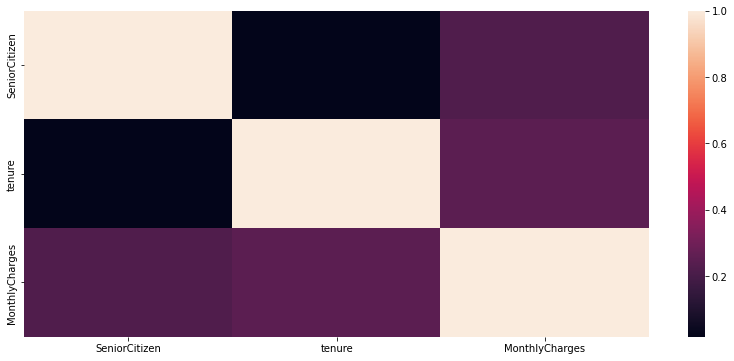

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr())
plt.show()

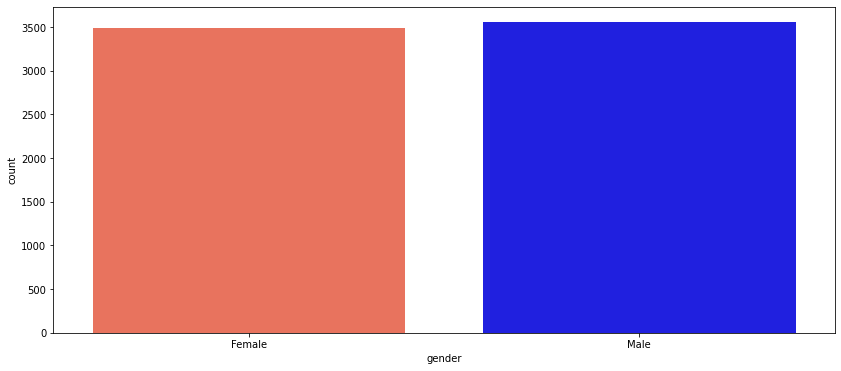

In [ ]:
plt.figure(figsize=(14,6))
# palette = {}
sns.countplot(data=df, 
              x='gender', 
              palette=('tomato', 'blue'))
plt.show()

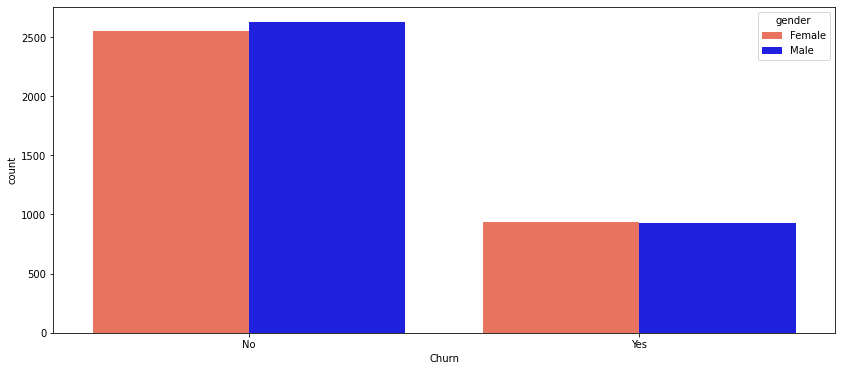

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot( 
              x='Churn',
              hue='gender',
              data=df,
              palette=('tomato', 'blue')
              )      
plt.show()

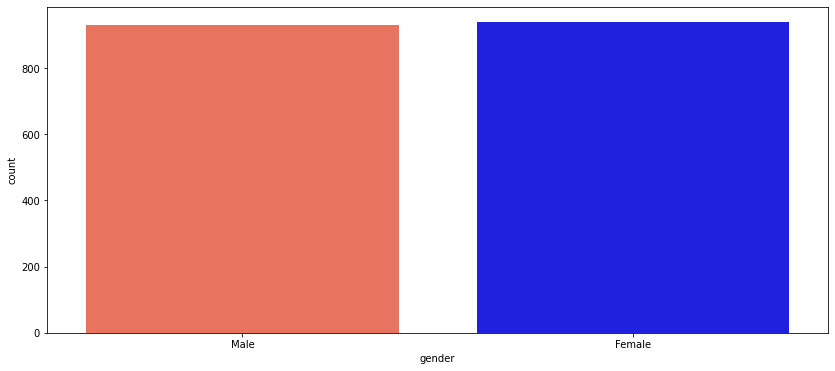

In [ ]:
# zoom in to those who left, churn=yes
plt.figure(figsize=(14,6))
sns.countplot(data=df.loc[df['Churn'] == 'Yes'],
              x=df.loc[df['Churn'] == 'Yes']['gender'],
              palette=('tomato', 'blue'))
plt.show()

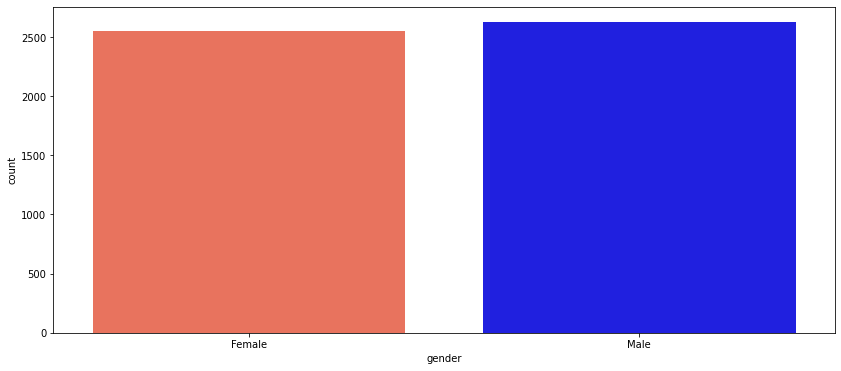

In [ ]:
# zoom in to those who stayed, churn=no
plt.figure(figsize=(14,6))
sns.countplot(data=df.loc[np.where(df['Churn'] == 'No')],
              x=df.loc[np.where(df['Churn'] == 'No')]['gender'],
              palette=('tomato', 'blue'))
plt.show()  

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df.loc[np.where(df['Churn'] == 'No')],
              x=df.loc[np.where(df['Churn'] == 'No')]['gender'],
              palette=('tomato', 'blue'))
plt.show()  

Index(['PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

<Figure size 1008x432 with 0 Axes>

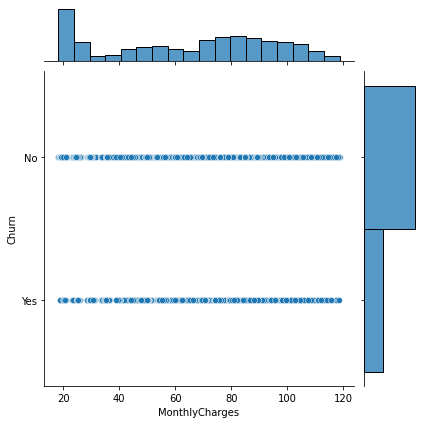

In [ ]:
plt.figure(figsize=(14,6))
sns.jointplot(x='MonthlyCharges', 
              y='Churn', 
              data=df)
plt.show()

# Modelling through Logisitic Regression

In [84]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score

In [44]:
# modelling without encoding: running on existing numerical features
lr = LogisticRegression(solver='lbfgs')

In [45]:
#Modelling based on Total Charges is the following
X = df[['TotalCharges']]
y = df['isChurn']

In [46]:
# using np.nan to number method np.nan_to_num(X) using Total Charges
# print(f"The five CV scores are: {cross_val_score(lr,np.nan_to_num(X), y, cv=5, scoring='accuracy', error_score='raise')}")
# print(f"The mean for the five CV scores is: {cross_val_score(lr,np.nan_to_num(X), y, cv=5, scoring='accuracy' ).mean()}")

print(f"The five CV scores are: {cross_val_score(lr,X, y, cv=5, scoring='accuracy', error_score='raise')}")


The five CV scores are: [0.73456352 0.73456352 0.73456352 0.73508523 0.734375  ]


In [47]:
# modeling on Monthly charges
X = df[['MonthlyCharges']]
y = df['isChurn']


In [48]:
print(f"The five CV scores are: {cross_val_score(lr,X, y, cv=5, scoring='accuracy', error_score='raise')}")
print(f"The mean for the five CV scores is: {cross_val_score(lr,X, y, cv=5, scoring='accuracy' ).mean()}")

The five CV scores are: [0.73456352 0.73456352 0.73456352 0.73508523 0.734375  ]
The mean for the five CV scores is: 0.7346301575908123


# Logistic Regression on Categorical Features: Encoding, Column Transforming and pipelining

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline

In [13]:
ohe = OneHotEncoder(sparse=False)

In [51]:
# Define the independent features (the dependent feature is churn)
X = df[['PaymentMethod', 'InternetService', 'Dependents', 'MonthlyCharges' ]]

In [52]:
# Encoded without column transformer  drand by dropping the numerical feature
ohe.fit_transform(X.drop('MonthlyCharges', axis=1))

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [53]:
ohe.categories_

[array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [54]:
# using columns to transform features to numerical
colTrans = make_column_transformer(
    (ohe, ['PaymentMethod', 'InternetService', 'Dependents'] ),
    remainder = 'passthrough'
)

In [55]:
colTrans.fit_transform(X)

array([[  0.  ,   0.  ,   1.  , ...,   1.  ,   0.  ,  29.85],
       [  0.  ,   0.  ,   0.  , ...,   1.  ,   0.  ,  56.95],
       [  0.  ,   0.  ,   0.  , ...,   1.  ,   0.  ,  53.85],
       ...,
       [  0.  ,   0.  ,   1.  , ...,   0.  ,   1.  ,  29.6 ],
       [  0.  ,   0.  ,   0.  , ...,   1.  ,   0.  ,  74.4 ],
       [  1.  ,   0.  ,   0.  , ...,   1.  ,   0.  , 105.65]])

In [56]:
# the monthly charges needs to be scaled otherwise, lets find out the score with out scaling
pipe = make_pipeline(colTrans, lr)

In [57]:
print(f"The five CV scores are: {cross_val_score(pipe,X, y, cv=5, scoring='accuracy', error_score='raise')}")
print(f"The mean for the five CV scores is: {cross_val_score(pipe,X, y, cv=5, scoring='accuracy' ).mean()}")

The five CV scores are: [0.76295245 0.76933996 0.76011356 0.76207386 0.75355114]
The mean for the five CV scores is: 0.7616061923349894


# Preprocessing

### Feature Scaling will bring all the features with in a common range, and hence the modelling will be more realistic



In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

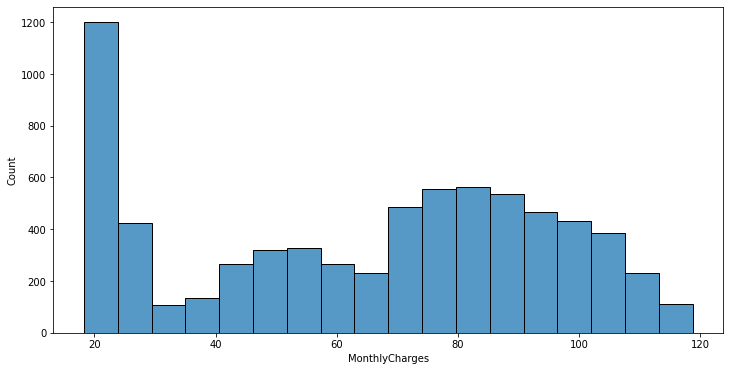

In [ ]:
# First lets figure out the Monthly Charges distribution
plt.figure(figsize=(12,6))
sns.histplot(df['MonthlyCharges'])
plt.show()

In [15]:
# using standard scalar (SS)
ss = preprocessing.StandardScaler()

In [ ]:
ss.fit_transform(ohe.fit_transform(X[['PaymentMethod', 'InternetService', 'Dependents']]))

array([[-0.5298852 , -0.52504733,  1.40641839, ..., -0.52592737,
         0.65401193, -0.65401193],
       [-0.5298852 , -0.52504733, -0.71102597, ..., -0.52592737,
         0.65401193, -0.65401193],
       [-0.5298852 , -0.52504733, -0.71102597, ..., -0.52592737,
         0.65401193, -0.65401193],
       ...,
       [-0.5298852 , -0.52504733,  1.40641839, ..., -0.52592737,
        -1.5290241 ,  1.5290241 ],
       [-0.5298852 , -0.52504733, -0.71102597, ..., -0.52592737,
         0.65401193, -0.65401193],
       [ 1.88720123, -0.52504733, -0.71102597, ..., -0.52592737,
         0.65401193, -0.65401193]])

In [ ]:
X.columns

Index(['PaymentMethod', 'InternetService', 'Dependents', 'MonthlyCharges'], dtype='object')

In [ ]:
# Transform the features to numerical
colTrans = make_column_transformer(
    (ohe, ['PaymentMethod', 'InternetService', 'Dependents'] ),
    (ss, ['MonthlyCharges']) 
)

In [ ]:
pipe = make_pipeline(colTrans, lr)

In [ ]:
print(f"The five CV scores are: {cross_val_score(pipe,X, y, cv=5, scoring='accuracy', error_score='raise')}")
print(f"The mean for the five CV scores is: {cross_val_score(pipe,X, y, cv=5, scoring='accuracy' ).mean()}")

The five CV scores are: [0.76295245 0.76933996 0.76011356 0.76136364 0.75355114]
The mean for the five CV scores is: 0.7614641468804438


# Using Transformers and Pipeline

In [181]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn import metrics

In [88]:
X = df.drop(['customerID','Churn', 'MonthlyCharges', 'isChurn'], axis=1)
print(X.shape)
X.columns

(7043, 18)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object')

In [89]:
y = df['isChurn']
y.shape

(7043,)

In [90]:
numericFeatures = X.select_dtypes(include='number').columns
numericFeatures

Index(['SeniorCitizen', 'tenure', 'TotalCharges'], dtype='object')

In [91]:
#Drop irrelevant data ID and Target feature churn rate
catFeatures = X.select_dtypes(exclude='number').columns
catFeatures

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [128]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.25, random_state = 2
)

In [129]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5282, 18) (1761, 18) (5282,) (1761,)


In [151]:
ss =  StandardScaler()

In [162]:
#encoding of Numeric features
numPipe = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scalar', StandardScaler())
])
# Scalar was not properly instantiated as StandardScalar, missed the opening and closing bracket causint the error: AttributeError: 'numpy.ndarray' object has no attribute 'fit'
#once the instantiation was corrected then the pipeline worked

In [186]:
#testing the code
numPipe.fit_transform(X[numericFeatures])

array([[-0.43991649, -1.27744458, -0.99424194],
       [-0.43991649,  0.06632742, -0.17324413],
       [-0.43991649, -1.23672422, -0.95967407],
       ...,
       [-0.43991649, -0.87024095, -0.85446945],
       [ 2.27315869, -1.15528349, -0.87206242],
       [-0.43991649,  1.36937906,  2.01428802]])

In [167]:
#encoding of Categorical features
catPipe = Pipeline(steps=[
          ('imputer', SimpleImputer(strategy='most_frequent')),
          ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)) # handle_unknown='ignore'--> zeros all unknown categories
])

In [187]:
#testing the code
catPipe.fit_transform(X[catFeatures])

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [168]:
#preprocessing-ColumnTransforming
ct = ColumnTransformer(transformers=[
                                ('num', numPipe, numericFeatures),
                                ('cat', catPipe, catFeatures)
])
ct.get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 Index(['SeniorCitizen', 'tenure', 'TotalCharges'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBacku

In [169]:
#instantiate with Logistic regression
clf = Pipeline([
                ('preprocessor', ct),
                ('model', LogisticRegression(solver='lbfgs'))
])

In [170]:
clf.fit_transform

<bound method Pipeline.fit_transform of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_

AttributeError: ignored

In [172]:
#fit the model with the training data
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                      

In [174]:
#predict based on the fitted model
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [182]:
#Using metrics method to get accuracy, scaling and codind resulted in a better accuracy of 79% compared to 76% without.
metrics.accuracy_score(y_test, y_pred)

0.7995457126632595